# Term Deposit (FIXED DEPOSIT) Subscription Prediction Project

### Dataset Description

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

Dataset Attributes

Description of all the variables:

Features- 

Variable: Definition

ID: Unique client ID

age: Age of the client

job: Type of job

marital: Marital status of the client

education: Education level

default: Credit in default

housing: Housing loan

loan: Personal loan

contact: Type of communication

month: Contact month

day_of_week: Day of week of contact

duration: Contact duration

campaign: number of contacts performed during this campaign to the client

pdays: number of days that passed by after the client was last contacted

previous: number of contacts performed before this campaign

poutcome: outcome of the previous marketing campaign


Target-

Subscribed: has the client subscribed a term deposit? (YES/NO)

Predict- Client subscribed a term deposit? Yes/No


### Importing Libraries

In [1]:
# Numerical computation and data manipulation 
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Z-score normalization and Box-Cox transformation
from scipy.stats import zscore, boxcox

# Suppress warnings
import warnings 
warnings.filterwarnings('ignore')

# SMOTE for class imbalance problem
from imblearn.over_sampling import SMOTE

# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Gausian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Support Vector Classifier
from sklearn.svm import SVC

# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble algorithms
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier

# XGBoost for boosting
import xgboost as xgb

# Metrics for checking the performance of models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import auc, roc_curve, RocCurveDisplay

# Data splitting and validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

# Saving and loading models
import joblib

### Elaboratory Data Analysis

In [2]:
# Load data from CSV into DataFrame

# Training data
df_train = pd.read_csv('Term_Deposit_Train.csv')

# Testing data
df_test = pd.read_csv('Term_Deposit_Test.csv')

In [3]:
# Display first 5 rows of the dataframe
df_train.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [4]:
# Display first 5 rows of the dataframe
df_test.head()

ID  age            job   marital  education default  balance housing  \
0  38441   32       services   married  secondary      no      118     yes   
1  40403   78        retired  divorced    primary      no     2787      no   
2   3709   31  self-employed    single   tertiary      no      144     yes   
3  37422   57       services    single    primary      no     3777     yes   
4  12527   45    blue-collar  divorced  secondary      no     -705      no   

  loan    contact  day month  duration  campaign  pdays  previous poutcome  
0   no   cellular   15   may        20         6     -1         0  unknown  
1   no  telephone    1   jul       372         1     -1         0  unknown  
2   no    unknown   16   may       676         1     -1         0  unknown  
3   no  telephone   13   may        65         2     -1         0  unknown  
4  yes    unknown    3   jul       111         1     -1         0  unknown

In [5]:
# Display last 5 rows of the dataframe
df_train.tail()

ID  age         job   marital  education default  balance housing  \
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes

In [6]:
# Display last 5 rows of the dataframe
df_test.tail()

ID  age          job  marital  education default  balance housing  \
13559  23465   39   management  married   tertiary      no       45      no   
13560  11743   54  blue-collar  married    primary      no     2281     yes   
13561  28292   35      retired  married    primary      no      285     yes   
13562  45163   29       admin.   single  secondary      no      464      no   
13563  34839   29       admin.  married  secondary      no        2     yes   

      loan   contact  day month  duration  campaign  pdays  previous poutcome  
13559   no  cellular   28   aug       148         4     -1         0  unknown  
13560   no   unknown   20   jun       158         1     -1         0  unknown  
13561   no  cellular   29   jan       136         1     -1         0  unknown  
13562   no  cellular    9   nov       208         2     91         3  success  
13563   no  cellular    6   may       339         1    362         1  failure

In [7]:
# Display shape of the dataframe
df_train.shape

(31647, 18)

In [8]:
# Display shape of the dataframe
df_test.shape

(13564, 17)

In [9]:
# Display names of the columns
df_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [10]:
# Display names of the columns
df_test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [11]:
# Checking for the null values
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [12]:
# Checking for the null values
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [13]:
# Checking for the no. of unique values present inside each column
df_train.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

In [14]:
# Checking for the no. of unique values present inside each column
df_test.nunique()

ID           13564
age             75
job             12
marital          3
education        4
default          2
balance       4292
housing          2
loan             2
contact          3
day             31
month           12
duration      1201
campaign        40
pdays          422
previous        33
poutcome         4
dtype: int64

In [15]:
# Checking for the value count in the feautres and target variable
columns = df_train.columns
for i in range(len(columns)):
    print(df_train[columns[i]].value_counts())

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64
no     31062
yes      585
Name: default, dtype: int64
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 296

In [16]:
# Checking for the value count in the feautres and target variable
columns = df_test.columns
for i in range(len(columns)):
    print(df_test[columns[i]].value_counts())

38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: ID, Length: 13564, dtype: int64
32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64
married     8119
single      3868
divorced    1577
Name: marital, dtype: int64
secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64
no     13334
yes      230
Name: default, dtype: int64
 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 8180       1
 3684       1
 4256       1
Name: balance, Len

In [17]:
# Display dataframe's details, such as column data types and missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [18]:
# Display dataframe's details, such as column data types and missing values
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [19]:
# Display summary statistics of the dataframe
df_train.describe()

ID           age        balance           day      duration  \
count  31647.000000  31647.000000   31647.000000  31647.000000  31647.000000   
mean   22563.972162     40.957247    1363.890258     15.835466    258.113534   
std    13075.936990     10.625134    3028.304293      8.337097    257.118973   
min        2.000000     18.000000   -8019.000000      1.000000      0.000000   
25%    11218.000000     33.000000      73.000000      8.000000    104.000000   
50%    22519.000000     39.000000     450.000000     16.000000    180.000000   
75%    33879.500000     48.000000    1431.000000     21.000000    318.500000   
max    45211.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  31647.000000  31647.000000  31647.000000  
mean       2.765697     39.576042      0.574272  
std        3.113830     99.317592      2.422529  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       63.000000    871.000000    275.000000

In [20]:
# Display summary statistics of the dataframe
df_test.describe()

ID           age       balance           day      duration  \
count  13564.000000  13564.000000  13564.000000  13564.000000  13564.000000   
mean   22704.057726     40.887128   1358.496535     15.738646    258.278679   
std    12994.043329     10.604108   3082.940623      8.288174    258.488648   
min        1.000000     18.000000  -3313.000000      1.000000      0.000000   
25%    11546.000000     33.000000     71.000000      8.000000    102.000000   
50%    22782.000000     39.000000    445.000000     16.000000    180.000000   
75%    33974.250000     48.000000   1413.250000     21.000000    319.000000   
max    45206.000000     95.000000  98417.000000     31.000000   3253.000000   

           campaign         pdays      previous  
count  13564.000000  13564.000000  13564.000000  
mean       2.759510     41.648555      0.594441  
std        3.060928    101.985178      1.998193  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       58.000000    850.000000     55.000000

### Data Visualization

In [21]:
sns.set(style = 'whitegrid')

#### Univariate Analysis

#### Count Plot

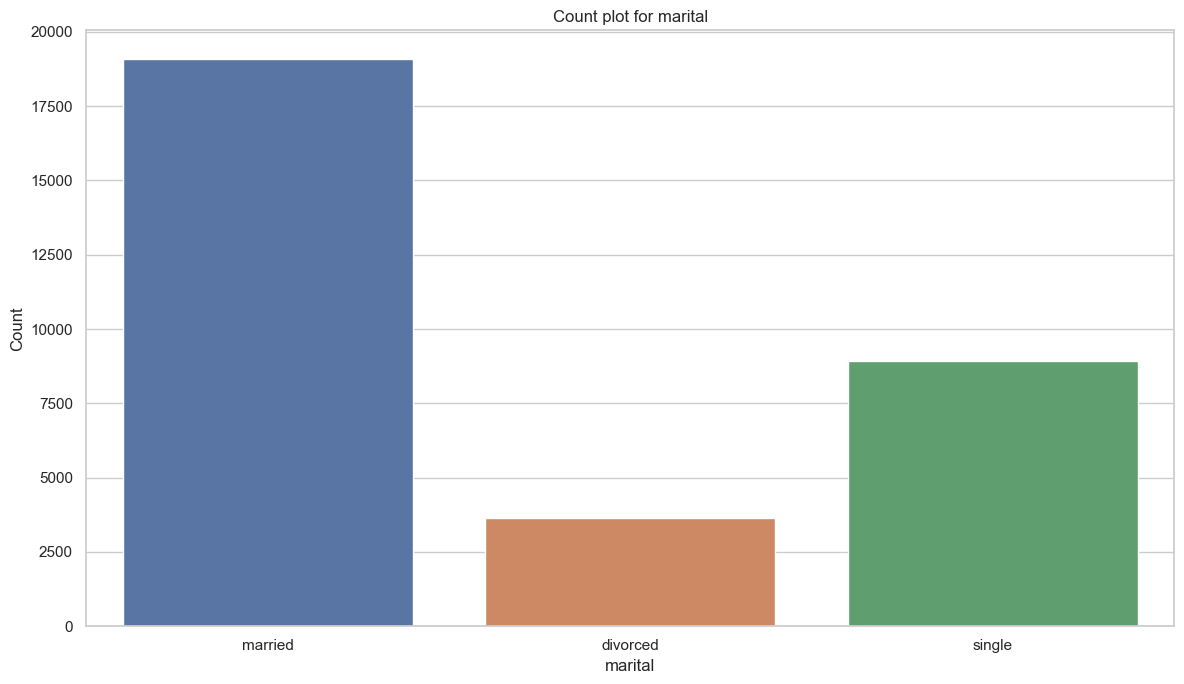

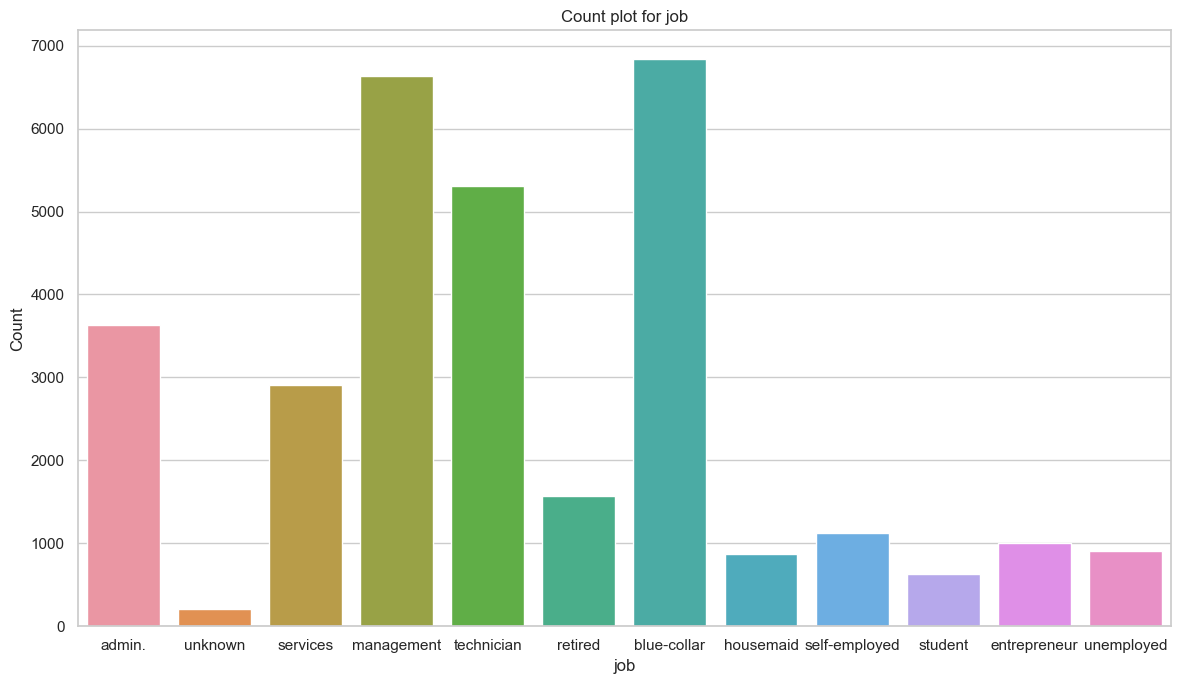

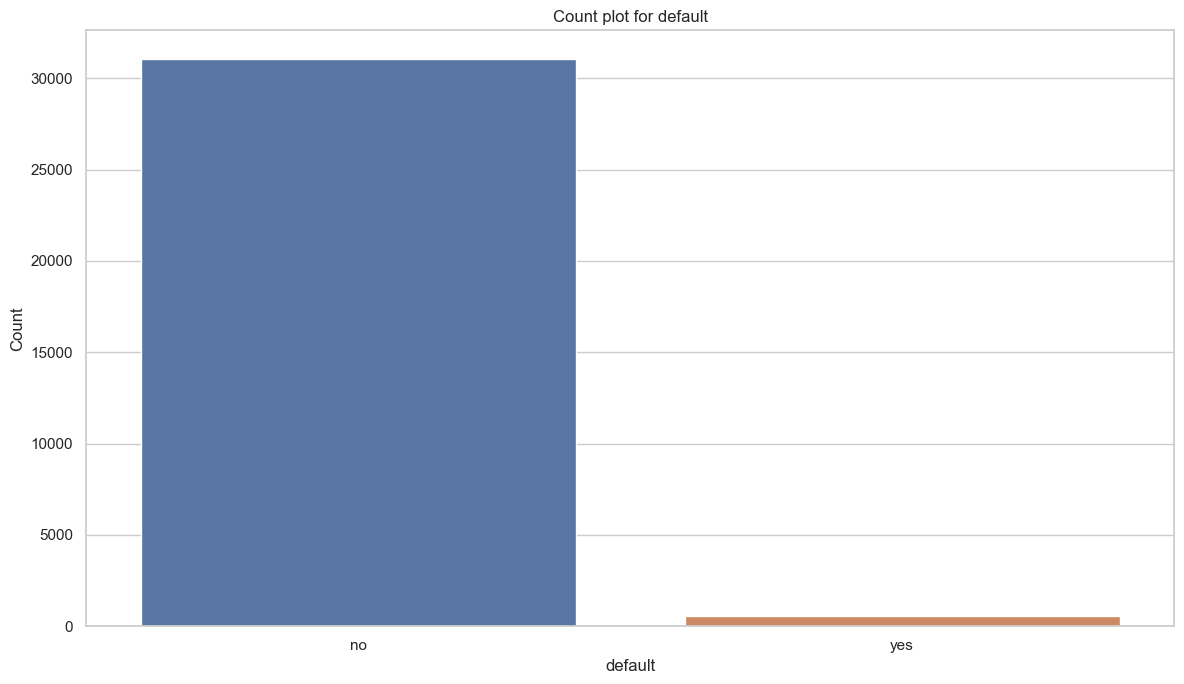

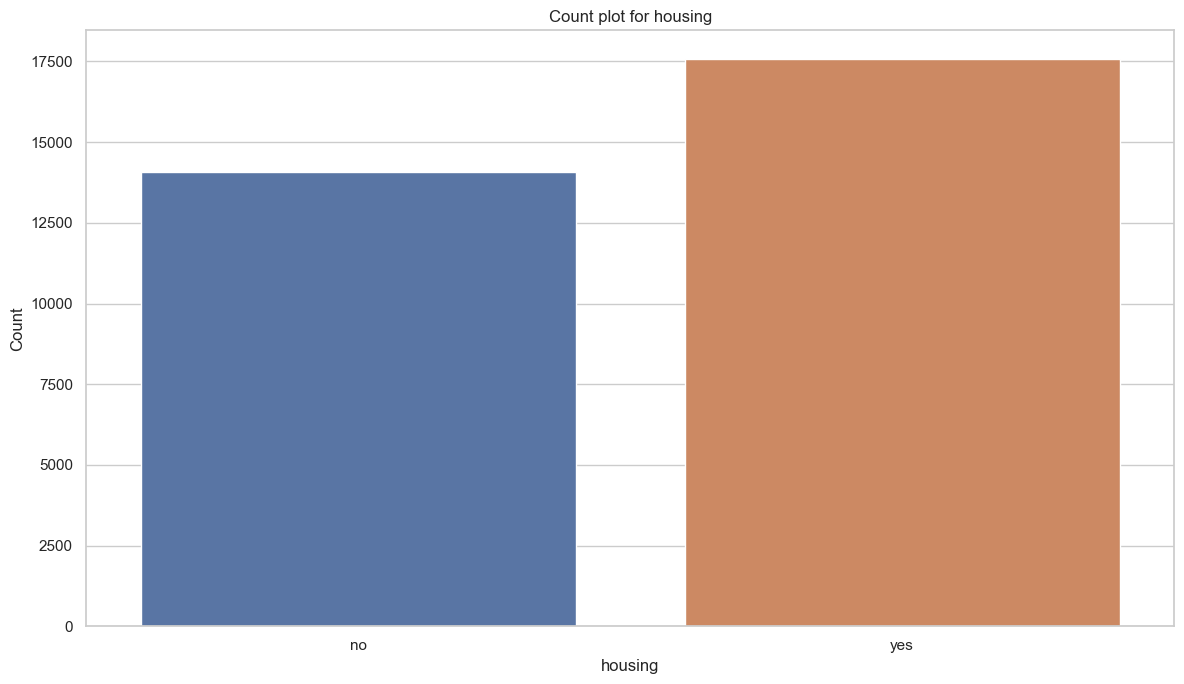

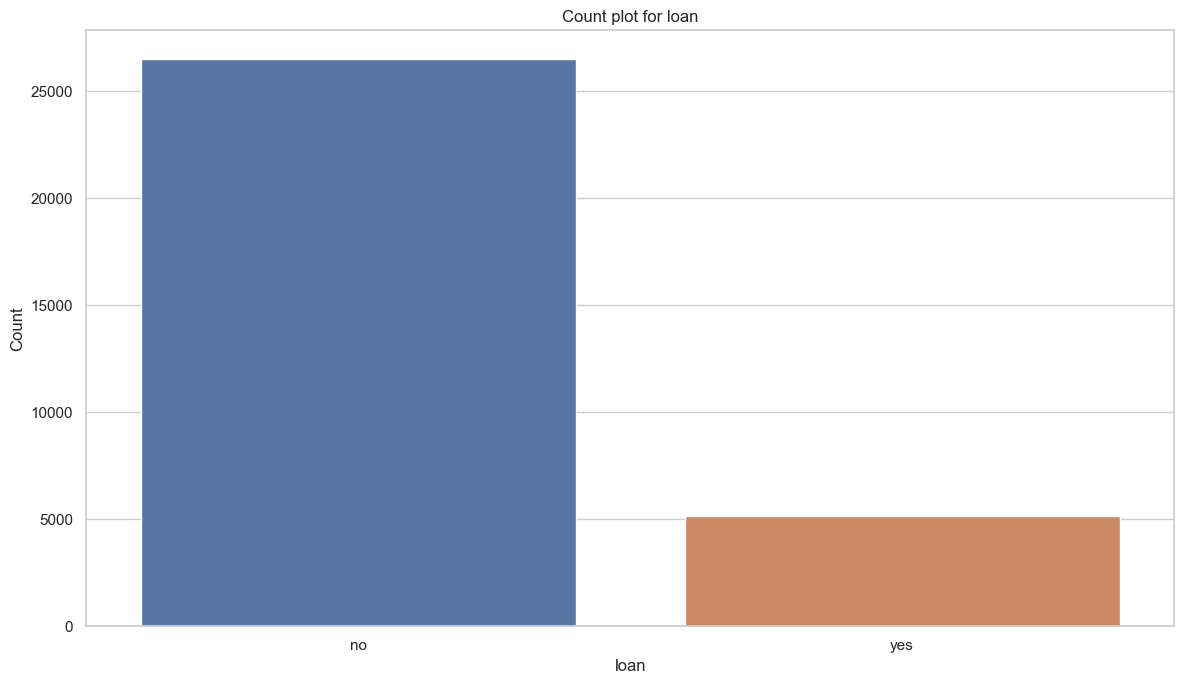

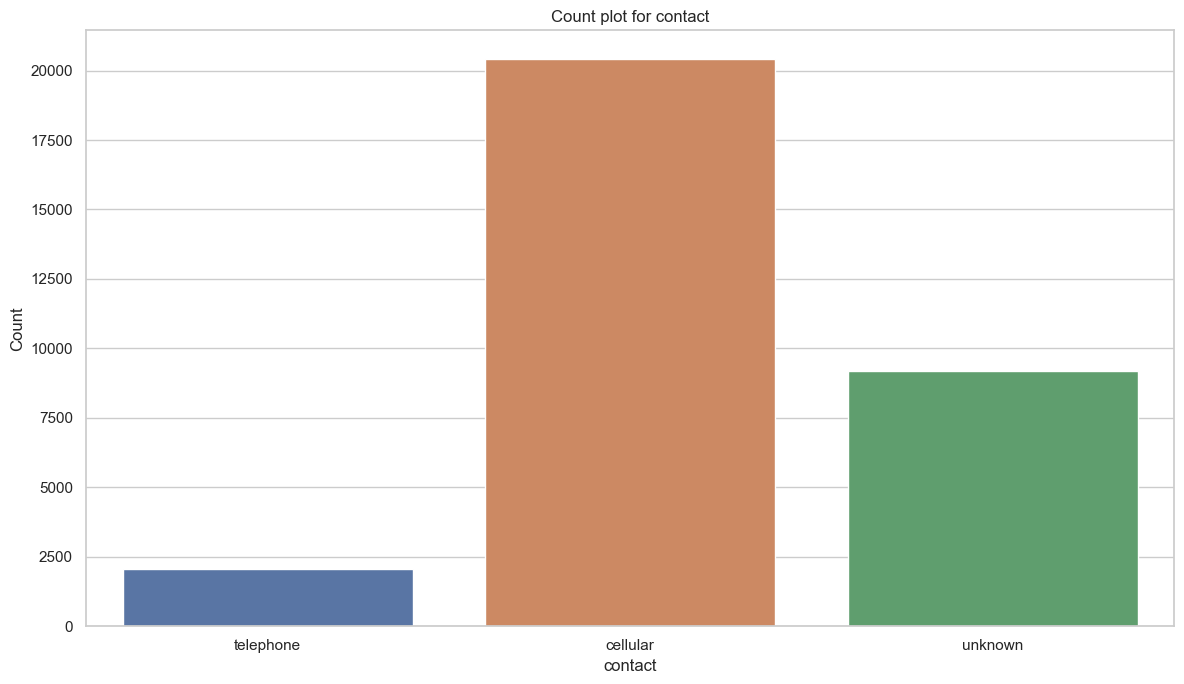

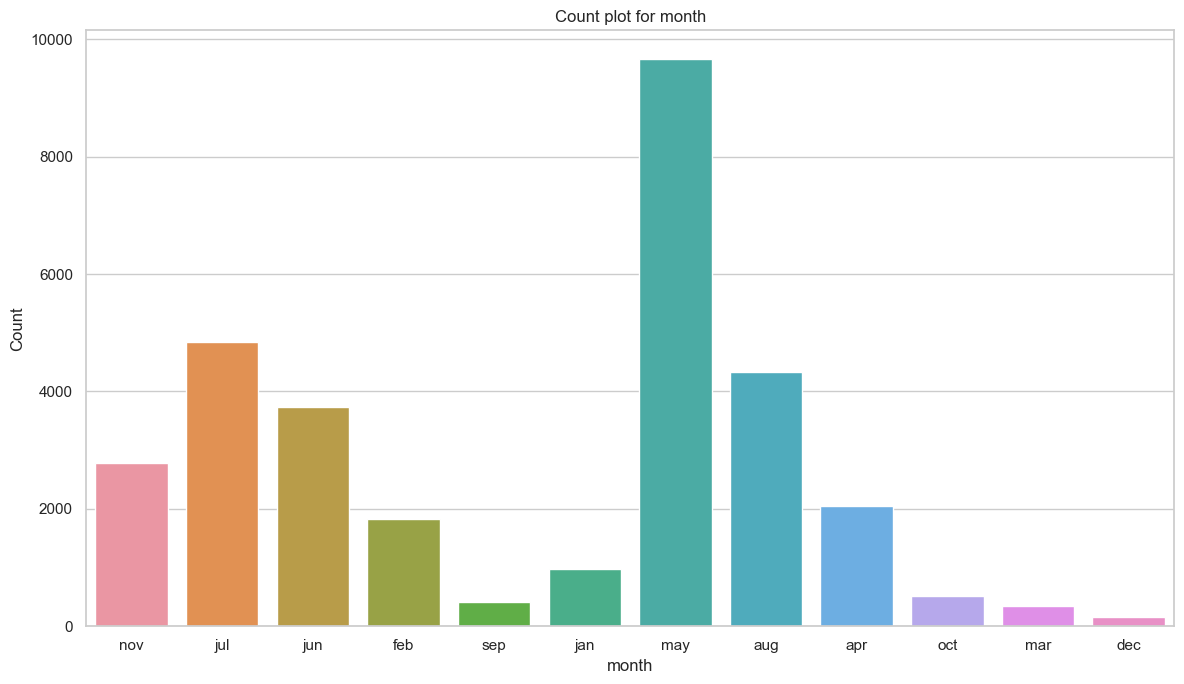

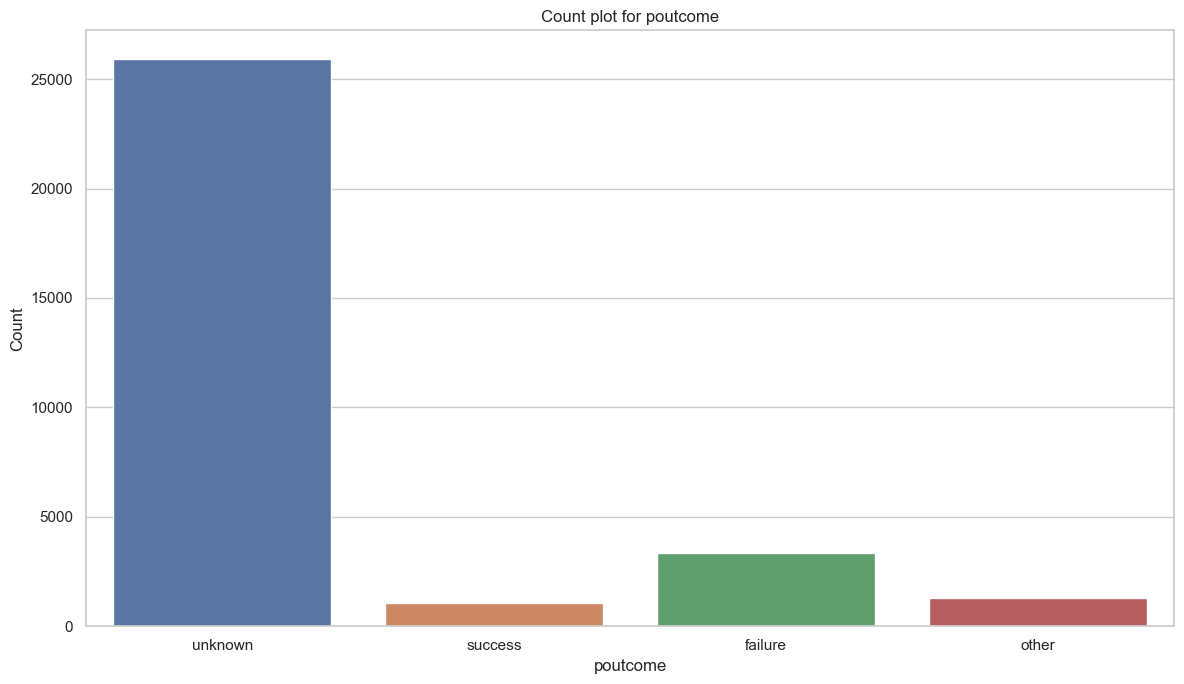

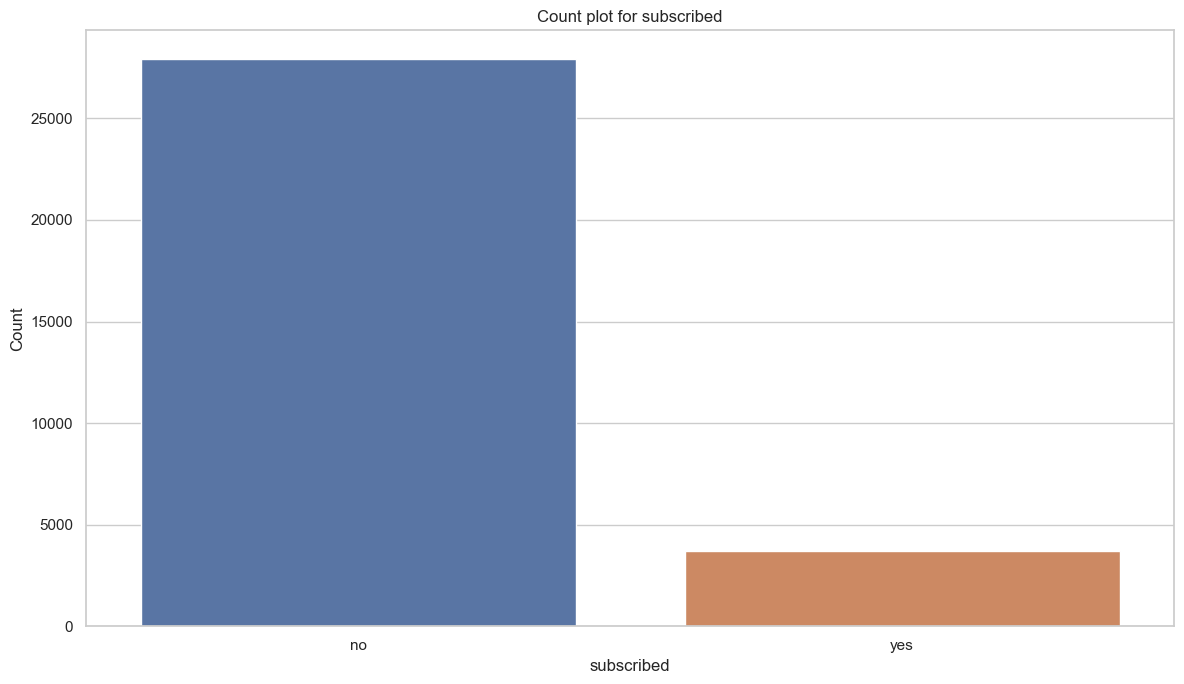

In [22]:
# Univariate analysis using countplot
columns = ['marital','job', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
for i in range(len(columns)):
    fig, axes = plt.subplots(figsize = (12, 7))  
    sns.countplot(x = columns[i], data = df_train, ax = axes)
    plt.title(f"Count plot for {columns[i]}")
    plt.xlabel(columns[i])
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

#### Histogram

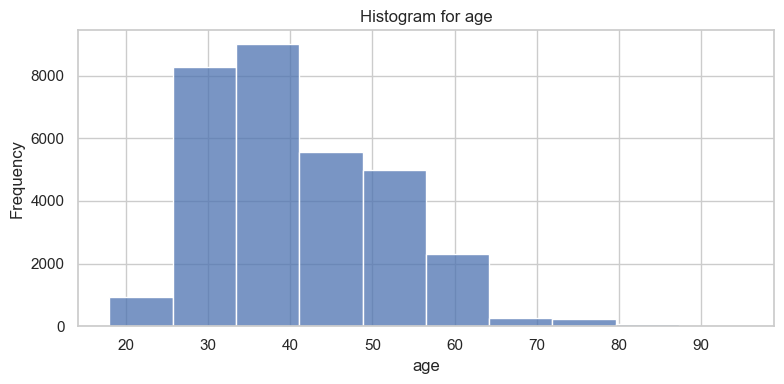

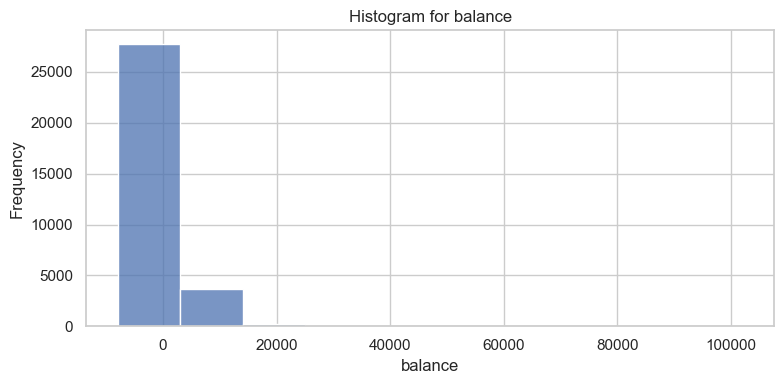

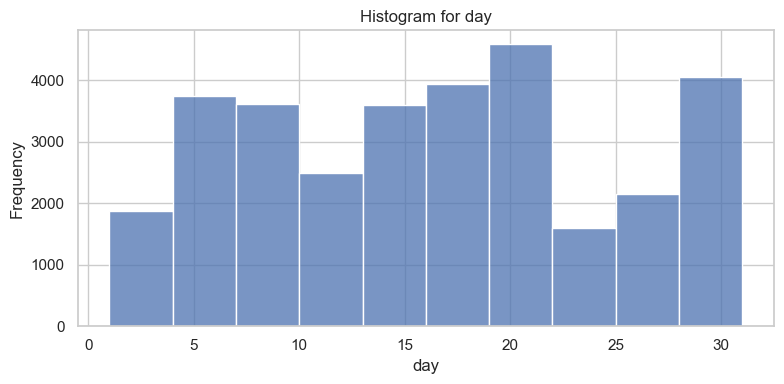

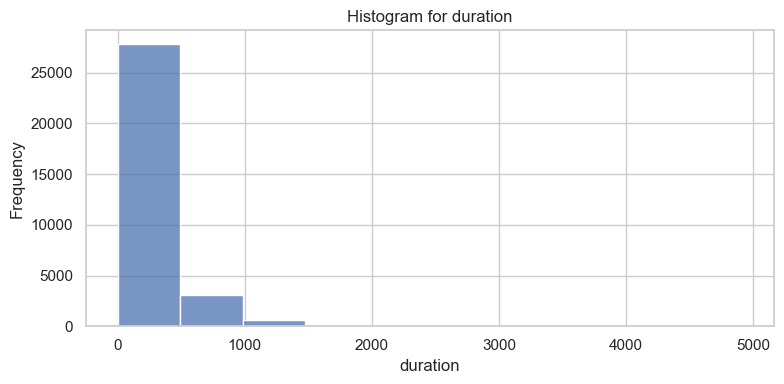

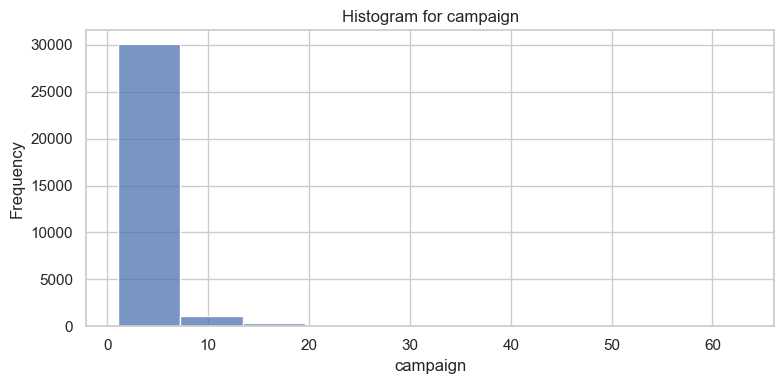

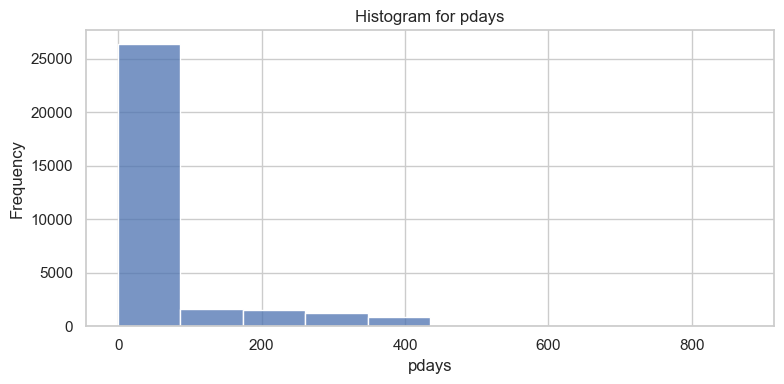

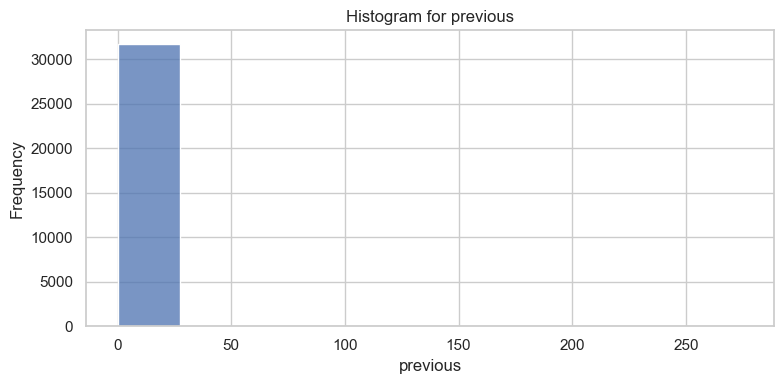

In [23]:
# Univariate analysis using histogram
columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i in range(len(columns)):
    fig, axes = plt.subplots(figsize=(8, 4))  
    sns.histplot(df_train[columns[i]], bins=10, ax = axes)
    plt.title(f"Histogram for {columns[i]}")
    plt.xlabel(columns[i])
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()  

#### Bivariate Analysis

#### Scatter Plot

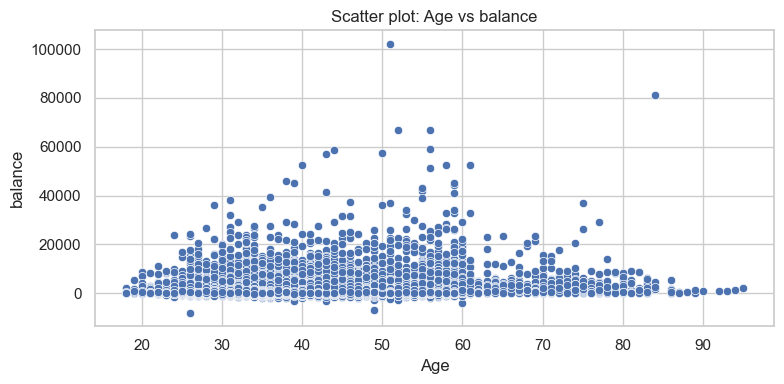

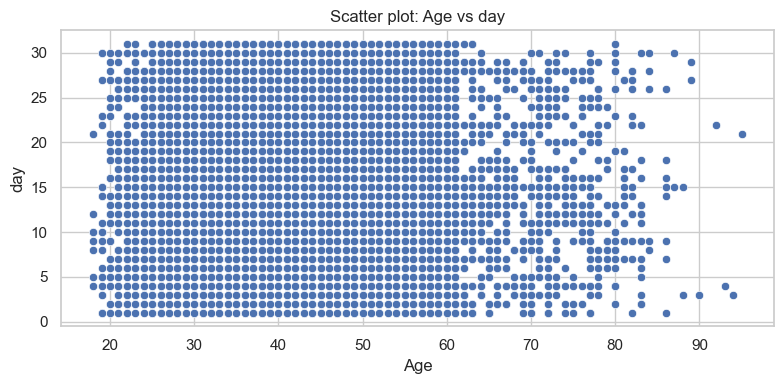

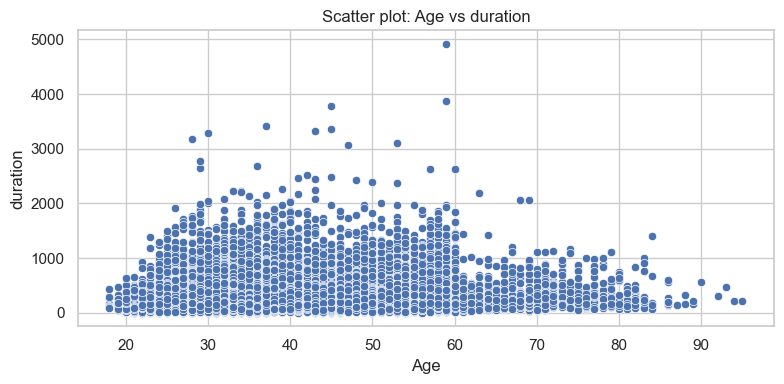

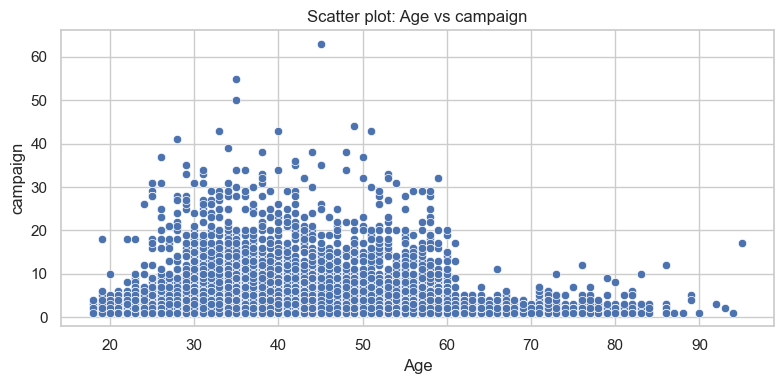

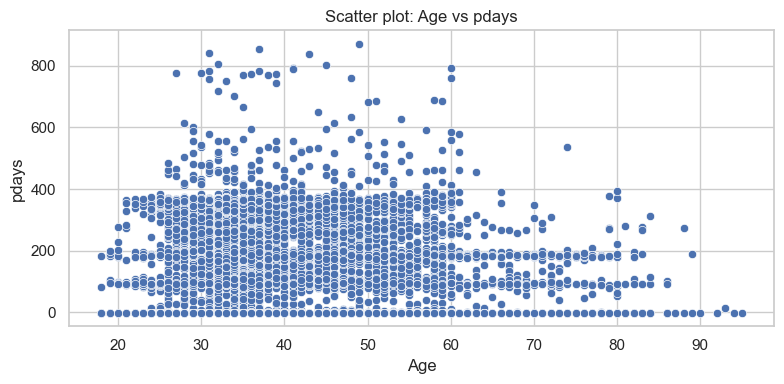

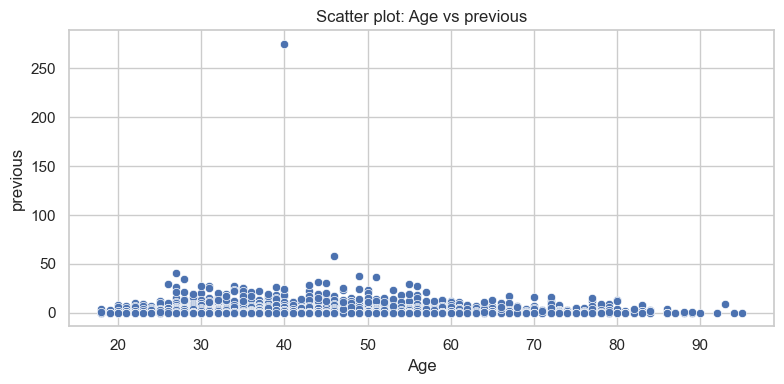

In [24]:
# Bivariate analysis using scatter plot
columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i in range(len(columns)):
    fig, axes = plt.subplots(figsize = (8, 4))  
    sns.scatterplot(data = df_train, x = 'age', y = columns[i], ax = axes)
    plt.title(f"Scatter plot: Age vs {columns[i]}")
    plt.xlabel('Age')
    plt.ylabel(columns[i])
    plt.tight_layout()
    plt.show()  

#### Line Plot

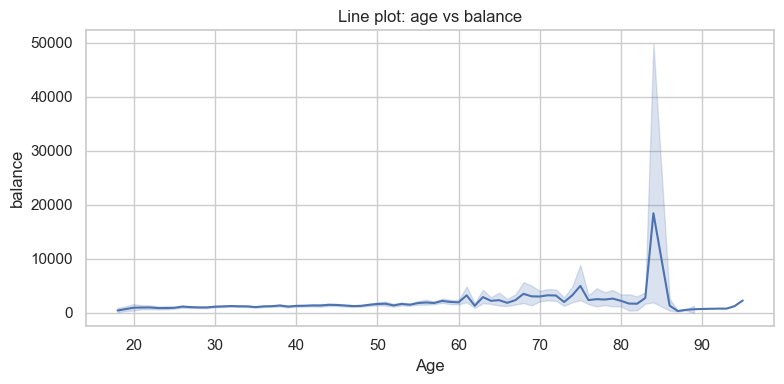

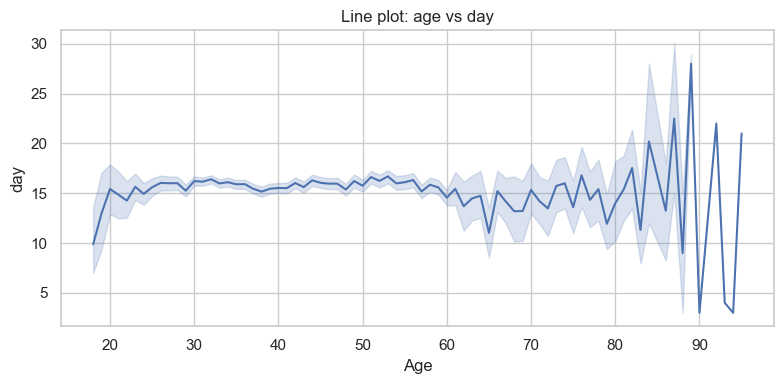

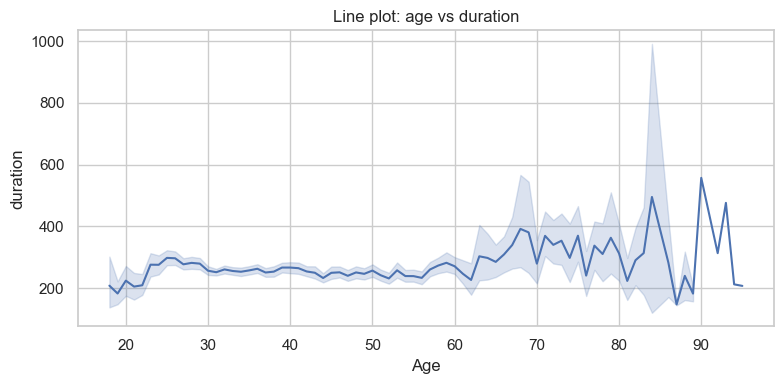

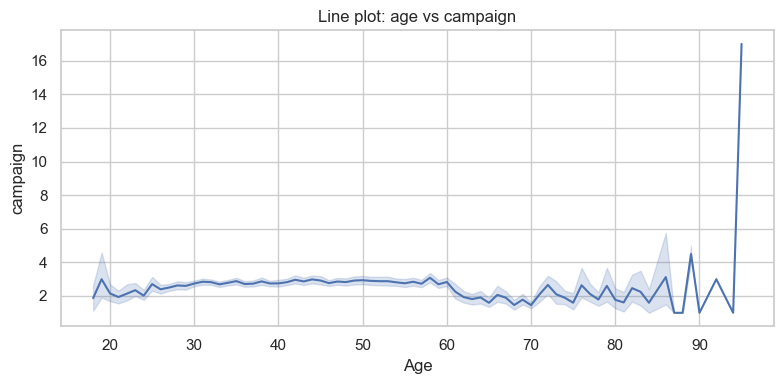

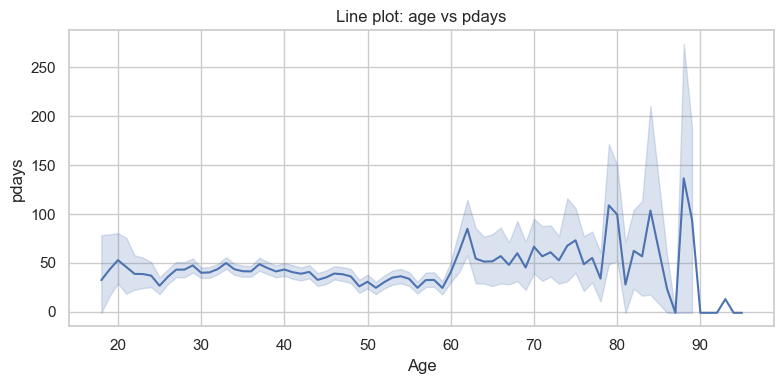

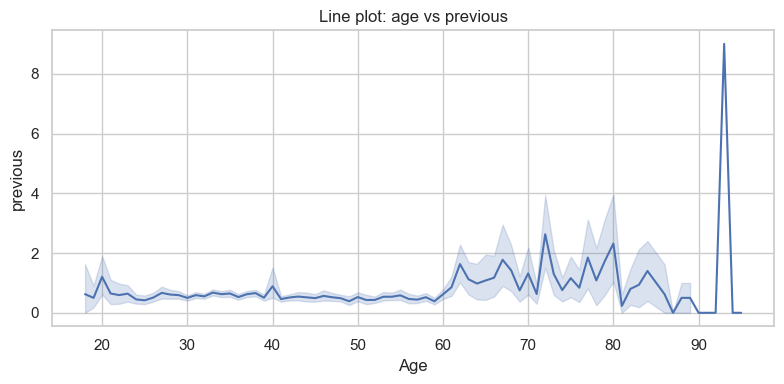

In [25]:
# Bivariate analysis using line plot
columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i in range(len(columns)):
    fig, axes = plt.subplots(figsize = (8, 4))  
    sns.lineplot(data = df_train, x = 'age', y = columns[i], ax = axes)
    plt.title(f"Line plot: age vs {columns[i]}")
    plt.xlabel('Age')
    plt.ylabel(columns[i])
    plt.tight_layout()
    plt.show()  

#### Multivariate analysis

#### Scatter plot

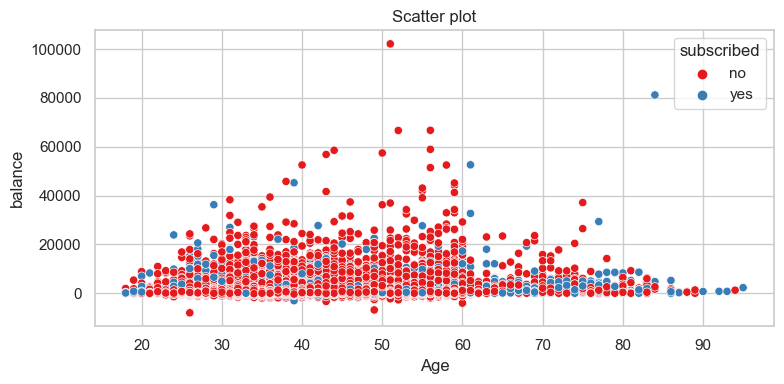

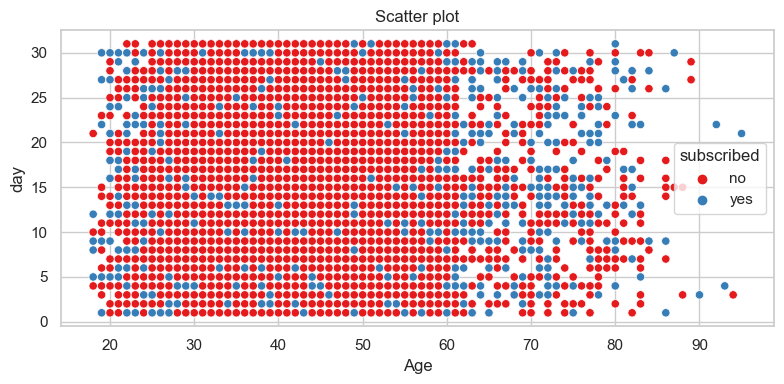

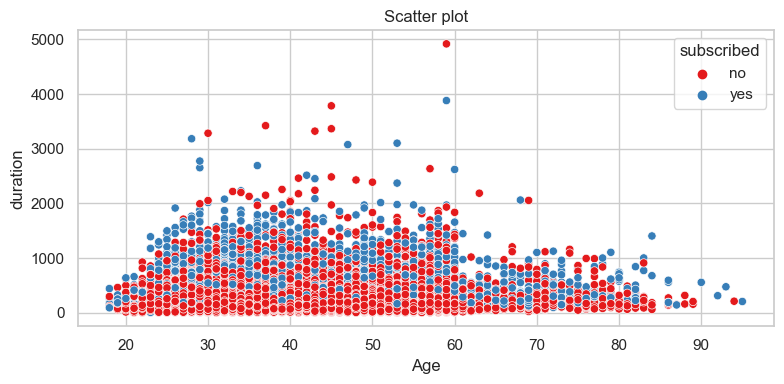

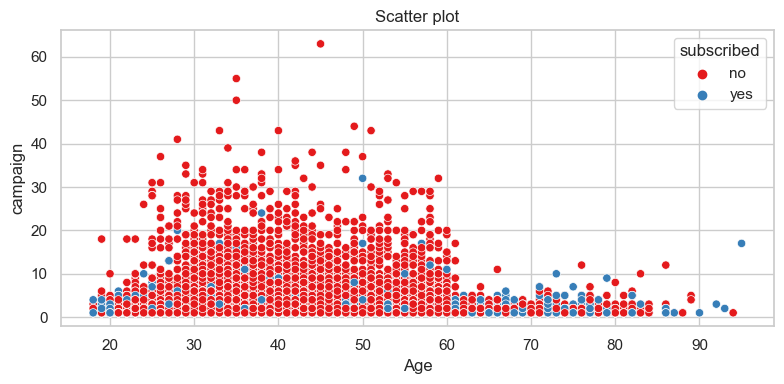

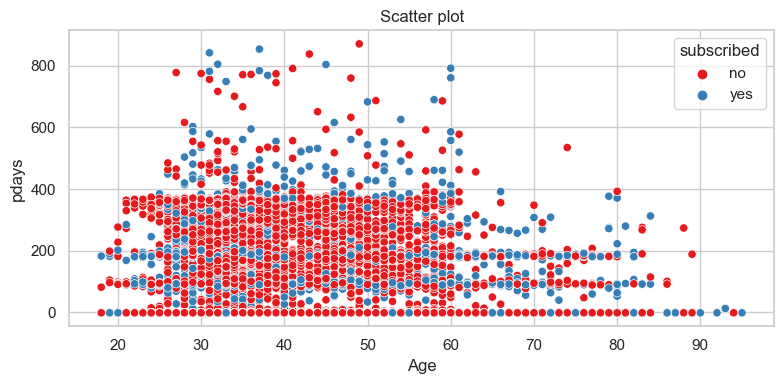

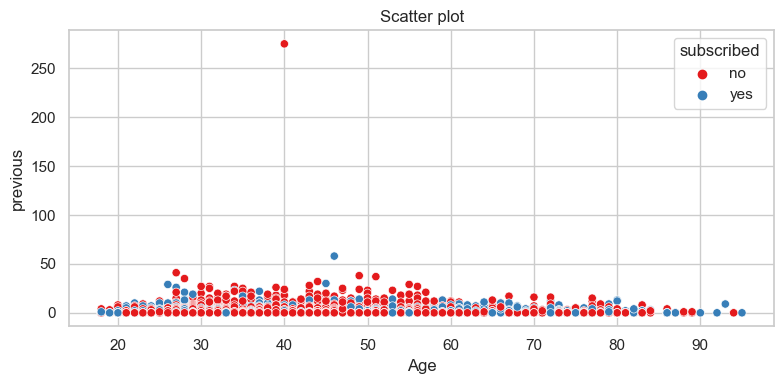

In [26]:
# Multivariate analysis using scatter plot
columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i in range(len(columns)):
    fig, axes = plt.subplots(figsize = (8, 4))  
    sns.scatterplot(data = df_train, x = 'age', y = columns[i], hue = 'subscribed', palette = 'Set1', ax = axes)
    plt.title(f"Scatter plot")
    plt.xlabel('Age')
    plt.ylabel(columns[i])
    plt.legend(title = 'subscribed')
    plt.tight_layout()
    plt.show()  

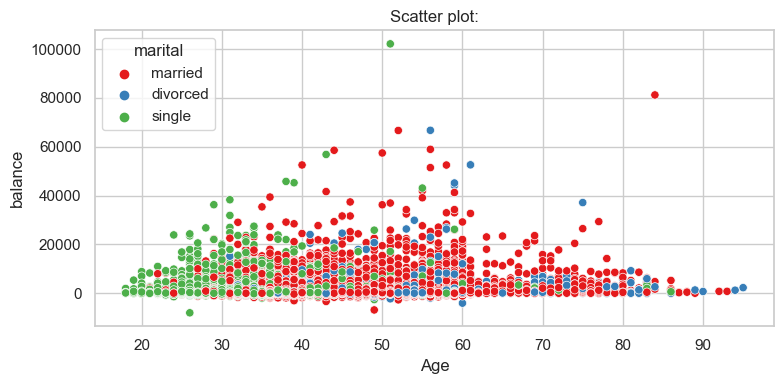

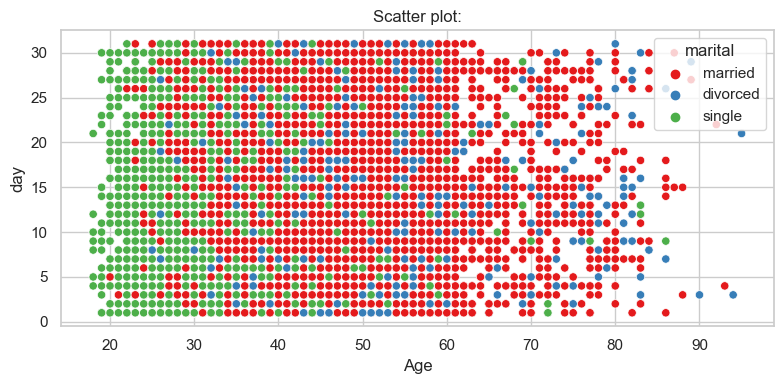

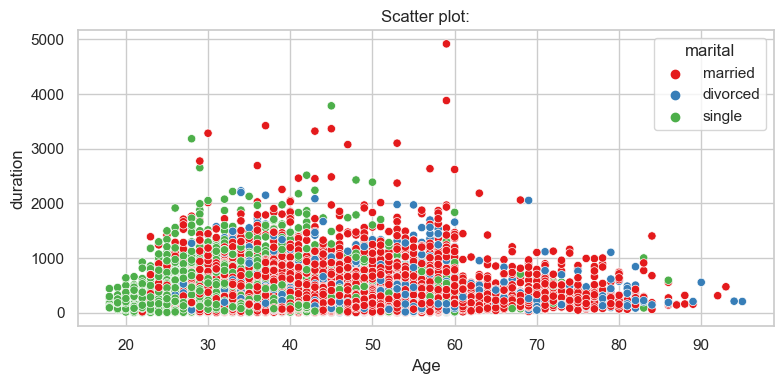

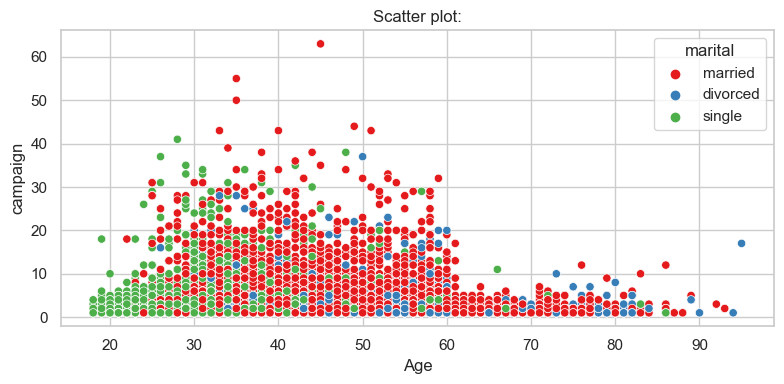

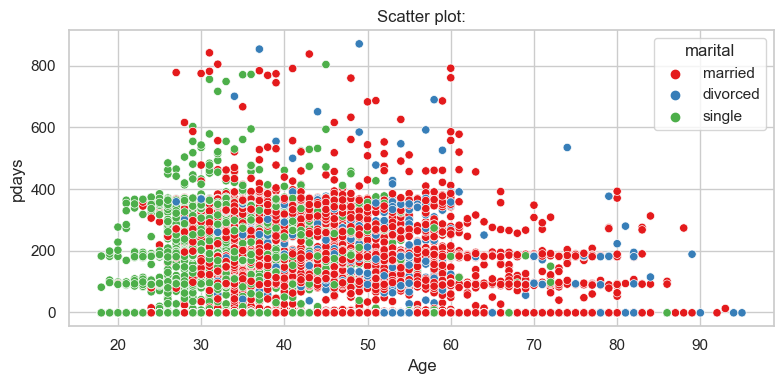

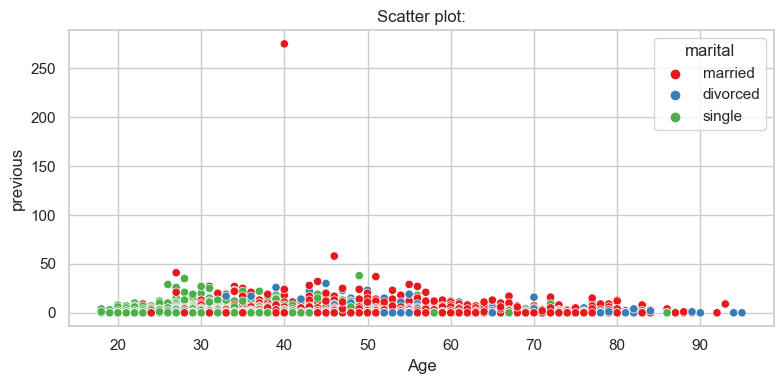

In [27]:
# Multivariate analysis using scatter plot
columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i in range(len(columns)):
    fig, axes = plt.subplots(figsize = (8, 4))  
    sns.scatterplot(data = df_train, x = 'age', y = columns[i], hue = 'marital', palette = 'Set1', ax = axes)
    plt.title(f"Scatter plot:")
    plt.xlabel('Age')
    plt.ylabel(columns[i])
    plt.legend(title = 'marital')
    plt.tight_layout()
    plt.show()  

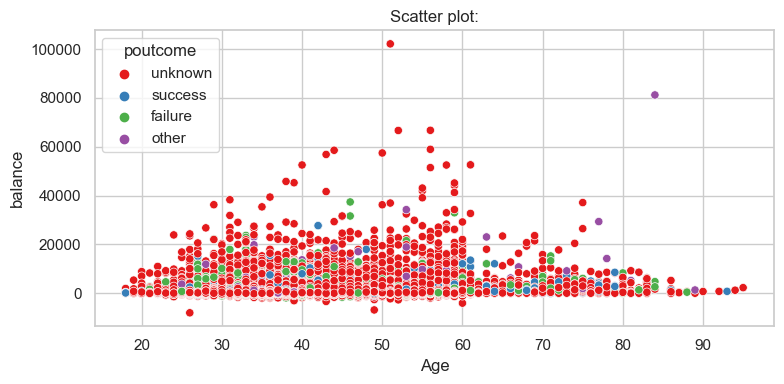

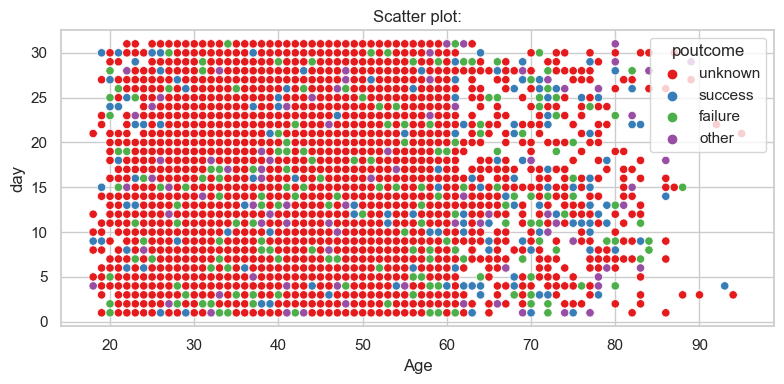

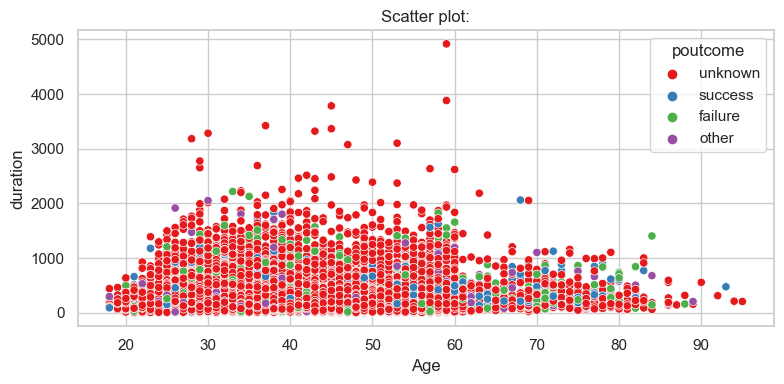

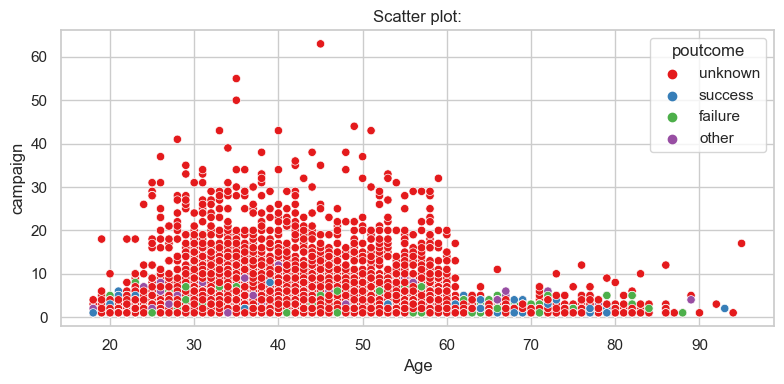

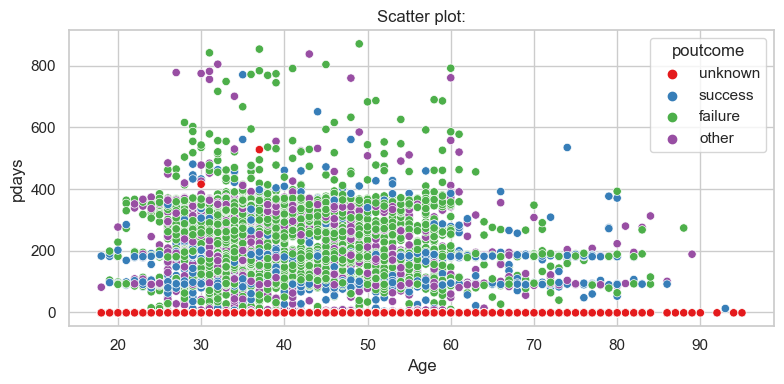

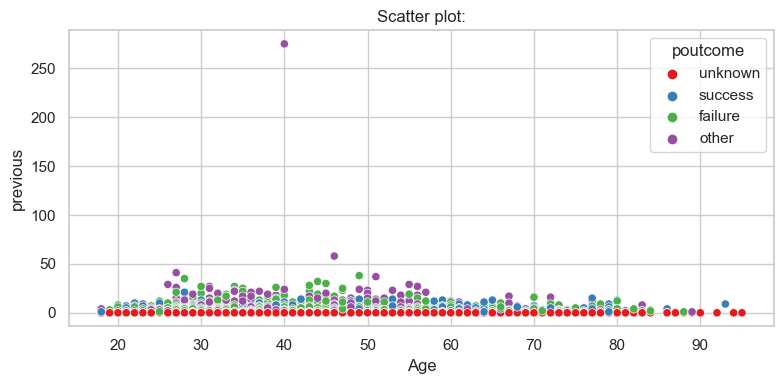

In [28]:
# Multivariate analysis using scatter plot
columns = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for i in range(len(columns)):
    fig, axes = plt.subplots(figsize = (8, 4))  
    sns.scatterplot(data = df_train, x = 'age', y = columns[i], hue = 'poutcome', palette = 'Set1', ax = axes)
    plt.title(f"Scatter plot:")
    plt.xlabel('Age')
    plt.ylabel(columns[i])
    plt.legend(title = 'poutcome')
    plt.tight_layout()
    plt.show()  

#### Data Preprocessing

Feature 'ID' is typically considered less significant for predicting term deposit subscription in the context of the term deposit subscription prediction dataset. This feature is not directly related with type of glass and may not provide meaningful information for the prediction task. So, it is better to drop it from both training dataset and testing dataset.

In [29]:
# Dropping columns containing unique values
df_train.drop('ID', axis = 1, inplace = True)

Training and Testing datsets have categorical features their conversion into numeric values is important.

In [30]:
# Converting categorical columns into numerical columns
encoder = LabelEncoder()
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']
for i in range(len(categorical_columns)):
    df_train[categorical_columns[i]] = encoder.fit_transform(df_train[categorical_columns[i]])
df_train.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   56    0        1          3        0     1933        0     0        1   
1   31   11        1          1        0        3        0     0        0   
2   27    7        1          1        0      891        1     0        0   
3   57    4        0          2        0     3287        0     0        0   
4   31    9        1          1        0      119        1     0        0   

   day  month  duration  campaign  pdays  previous  poutcome  subscribed  
0   19      9        44         2     -1         0         3           0  
1   20      5        91         2     -1         0         3           0  
2   18      5       240         1     -1         0         3           0  
3   22      6       867         1     84         3         2           1  
4    4      3       380         1     -1         0         3           0

In [31]:
# Copy the testing dataset
df_test1 = df_test.copy()

In [32]:
# Dropping columns containing unique values
df_test1.drop('ID', axis = 1, inplace = True)

In [33]:
# Converting categorical features values into numeric values
encoder = LabelEncoder()
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for i in range(len(categorical_columns)):
    df_test1[categorical_columns[i]] = encoder.fit_transform(df_test1[categorical_columns[i]])
df_test1.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   32    7        1          1        0      118        1     0        0   
1   78    5        0          0        0     2787        0     0        1   
2   31    6        2          2        0      144        1     0        2   
3   57    7        2          0        0     3777        1     0        1   
4   45    1        0          1        0     -705        0     1        2   

   day  month  duration  campaign  pdays  previous  poutcome  
0   15      8        20         6     -1         0         3  
1    1      5       372         1     -1         0         3  
2   16      8       676         1     -1         0         3  
3   13      8        65         2     -1         0         3  
4    3      5       111         1     -1         0         3

In [34]:
# Extracting numeric features from dataset for outliers and skewness testing
numeric_features = df_train[['age', 'balance', 'day', 'duration']]

#### Checking for the outliers

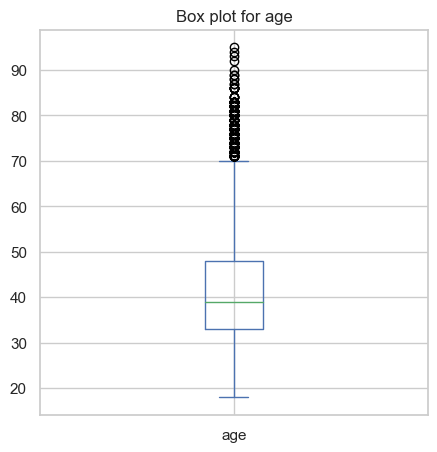

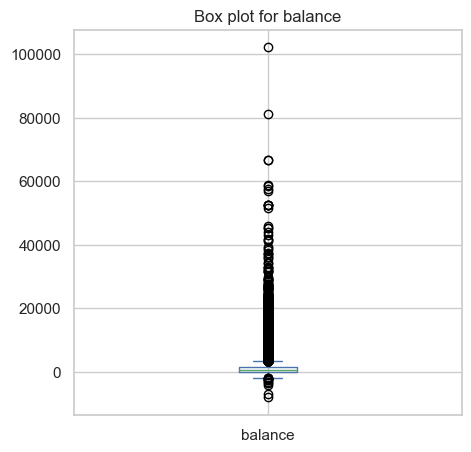

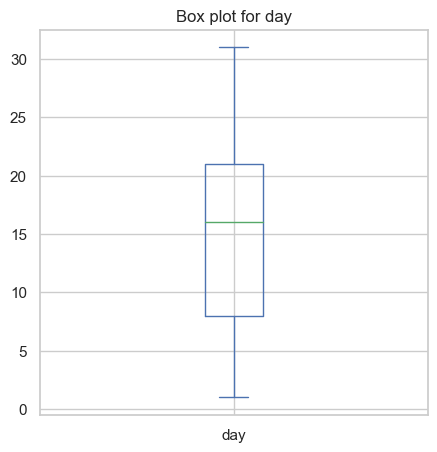

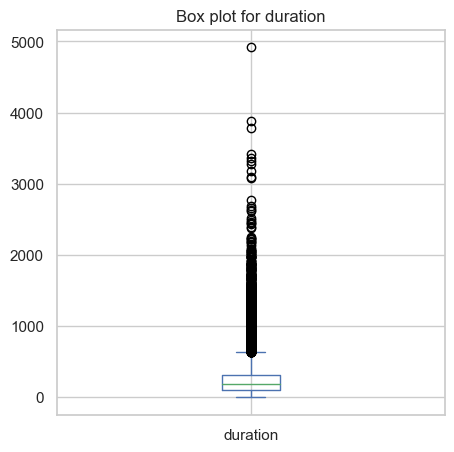

In [35]:
# Cheking for the outliers in features containing numeric values

# Using boxplot
for column in numeric_features.columns:
    df_train[column].plot(kind = 'box', figsize=(5, 5))
    plt.title(f'Box plot for {column}')
    plt.show()

Outliers are present in these features.

In [36]:
# Using Z-Score
z_score = abs(zscore(numeric_features))
z_score

age   balance       day  duration
0      1.415793  0.187933  0.379579  0.832754
1      0.937156  0.449397  0.499526  0.649957
2      1.313627  0.156159  0.259631  0.070449
3      1.509911  0.635055  0.739422  2.368149
4      0.937156  0.411091  1.419637  0.474054
...         ...       ...       ...       ...
31642  1.125392  0.450388  0.460055  0.552724
31643  1.133439  0.324903  1.299690  0.699635
31644  0.843038  0.347358  1.059794  0.859979
31645  1.509911  0.376088  0.100212  0.918319
31646  1.321675  0.383022  0.580003  6.669728

[31647 rows x 4 columns]

In [37]:
# Shape of features before removing outliers
numeric_features.shape

(31647, 4)

In [38]:
# Removing Outliers
z = 3
numeric_features = numeric_features[(z_score < z).all(axis = 1)]
numeric_features.head()

age  balance  day  duration
0   56     1933   19        44
1   31        3   20        91
2   27      891   18       240
3   57     3287   22       867
4   31      119    4       380

In [39]:
# Shape of features after removing outliers
numeric_features.shape

(30206, 4)

#### Checking for the skewness

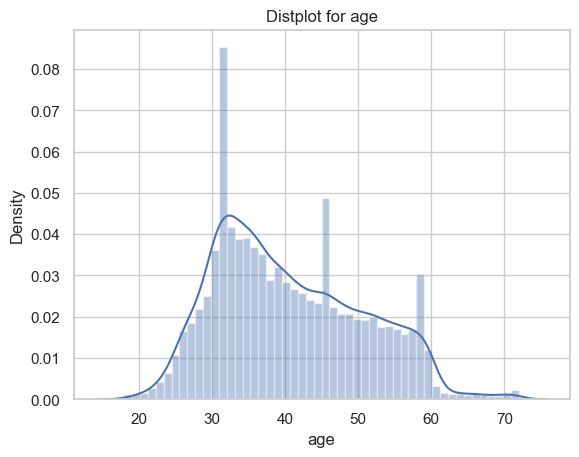

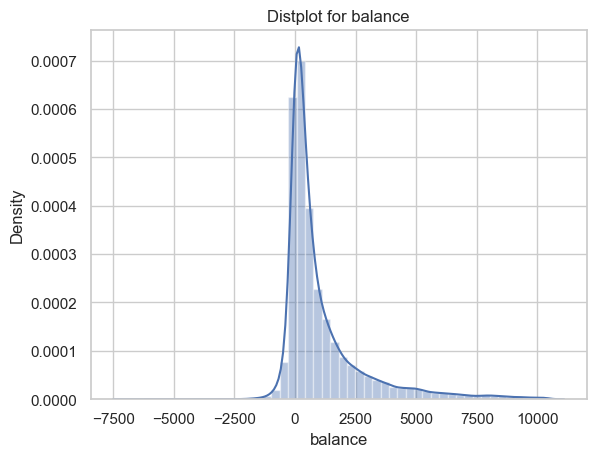

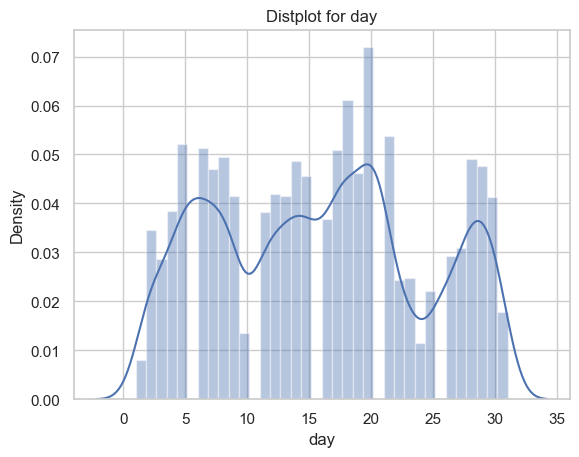

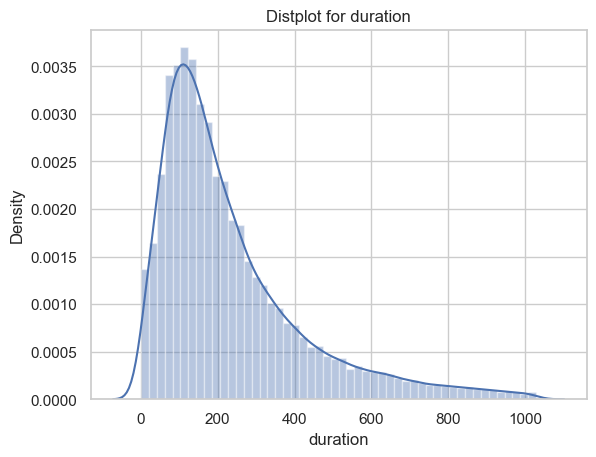

In [40]:
# Checking for the skewness

# Using distplot
for column in numeric_features.columns:
    sns.distplot(numeric_features[column])
    plt.title(f'Distplot for {column}')
    plt.show()

In [41]:
# Using skew() method
numeric_features.skew()

age         0.449710
balance     2.447707
day         0.087937
duration    1.588775
dtype: float64

Features with positive skewness values are 'age', 'balance' and 'duration' have a right-skewed distribution.

In [42]:
# Reducing skewness 
# List of features with high skewness
high_skewed_features = ['age', 'balance', 'duration']
transformed_df1 = df_train.copy()
transformed_df2 = df_train.copy()
transformed_df3 = df_train.copy()
transformed_df4 = df_train.copy()
transformed_df5 = df_train.copy()
transformed_df6 = df_train.copy()
transformed_df7 = df_train.copy()

# Apply different transformations

# Log Transformation
transformed_df1[high_skewed_features] = np.log1p(df_train[high_skewed_features])

# Square Root Transformation
transformed_df2[high_skewed_features] = np.sqrt(df_train[high_skewed_features])

# Boxcox Transformation
for feature in high_skewed_features:
    if feature == 'balance':  
        constant = abs(df_train[feature].min()) + 1  
        transformed_df3[feature], lambda_value = boxcox(df_train[feature] + constant)
    else:
        transformed_df3[feature], lambda_value = boxcox(df_train[feature] + 1)

# Reciprocal Transformation
transformed_df4[high_skewed_features] = 1 / (df_train[high_skewed_features] + 1)  # Adding 1 to handle zero values

# Exponential Transformation
transformed_df5[high_skewed_features] = np.exp(df_train[high_skewed_features])

# Power Transformation
transformed_df6[high_skewed_features] = df_train[high_skewed_features] ** 2
transformed_df7[high_skewed_features] = df_train[high_skewed_features] ** 3

In [43]:
transformed_df1[high_skewed_features].skew()

age         0.11394
balance         NaN
duration   -0.43860
dtype: float64

In [44]:
transformed_df2[high_skewed_features].skew()

age         0.381346
balance     1.886565
duration    1.179872
dtype: float64

In [45]:
transformed_df3[high_skewed_features].skew()

age         0.008940
balance    -0.095588
duration    0.017331
dtype: float64

In [46]:
transformed_df4[high_skewed_features].skew()

age          0.436295
balance           NaN
duration    12.645120
dtype: float64

In [47]:
transformed_df5[high_skewed_features].skew()

age         150.58884
balance           NaN
duration          NaN
dtype: float64

In [48]:
transformed_df6[high_skewed_features].skew()

age          1.416987
balance     46.566660
duration    17.205950
dtype: float64

Boxcox transformation reduced the skewness to the maximum extent therefore, the features in transformed_df3 exhibit reduced skewness.

In [49]:
df_train2 = transformed_df3
df_train2.head()

age  job  marital  education  default   balance  housing  loan  \
0  2.797655    0        1          3        0  8.783172        0     0   
1  2.519754   11        1          1        0  8.586870        0     0   
2  2.450901    7        1          1        0  8.682520        1     0   
3  2.805552    4        0          2        0  8.899119        0     0   
4  2.519754    9        1          1        0  8.599956        1     0   

   contact  day  month   duration  campaign  pdays  previous  poutcome  \
0        1   19      9   4.936081         2     -1         0         3   
1        0   20      5   6.170834         2     -1         0         3   
2        0   18      5   8.027435         1     -1         0         3   
3        0   22      6  10.890771         1     84         3         2   
4        0    4      3   8.996108         1     -1         0         3   

   subscribed  
0           0  
1           0  
2           0  
3           1  
4           0

In [50]:
# Checking the correalation coefficient matrix
correlation_coefficient = df_train2.corr()
correlation_coefficient

age       job   marital  education   default   balance  \
age         1.000000 -0.031890 -0.432958  -0.099608 -0.013877  0.107520   
job        -0.031890  1.000000  0.066124   0.170347 -0.005217  0.026924   
marital    -0.432958  0.066124  1.000000   0.107547 -0.009591  0.006295   
education  -0.099608  0.170347  0.107547   1.000000 -0.006774  0.071190   
default    -0.013877 -0.005217 -0.009591  -0.006774  1.000000 -0.107966   
balance     0.107520  0.026924  0.006295   0.071190 -0.107966  1.000000   
housing    -0.156604 -0.125347 -0.017846  -0.095376 -0.011823 -0.073057   
loan       -0.005381 -0.039049 -0.041654  -0.045950  0.081567 -0.106086   
contact     0.034079 -0.078253 -0.040180  -0.112000  0.014053 -0.030104   
day        -0.007436  0.020951 -0.007686   0.017902  0.009996  0.006748   
month      -0.039219 -0.089384 -0.003834  -0.055967  0.004694  0.025318   
duration   -0.017566  0.001905  0.013028   0.002756 -0.009462  0.029829   
campaign    0.013470  0.001469 -0.009394   0.006142  0.018538 -0.019111   
pdays      -0.023668 -0.022552  0.019741  -0.001566 -0.029622  0.008190   
previous    0.001820 -0.003032  0.012717   0.015280 -0.015877  0.022168   
poutcome    0.009540  0.007101 -0.019770  -0.019007  0.035067 -0.032399   
subscribed -0.001720  0.038921  0.046043   0.066051 -0.020168  0.068113   

             housing      loan   contact       day     month  duration  \
age        -0.156604 -0.005381  0.034079 -0.007436 -0.039219 -0.017566   
job        -0.125347 -0.039049 -0.078253  0.020951 -0.089384  0.001905   
marital    -0.017846 -0.041654 -0.040180 -0.007686 -0.003834  0.013028   
education  -0.095376 -0.045950 -0.112000  0.017902 -0.055967  0.002756   
default    -0.011823  0.081567  0.014053  0.009996  0.004694 -0.009462   
balance    -0.073057 -0.106086 -0.030104  0.006748  0.025318  0.029829   
housing     1.000000  0.036244  0.195103 -0.025666  0.271442 -0.000464   
loan        0.036244  1.000000 -0.009213  0.014769  0.024186 -0.009621   
contact     0.195103 -0.009213  1.000000 -0.027046  0.362934 -0.038242   
day        -0.025666  0.014769 -0.027046  1.000000 -0.000604 -0.058050   
month       0.271442  0.024186  0.362934 -0.000604  1.000000  0.003569   
duration   -0.000464 -0.009621 -0.038242 -0.058050  0.003569  1.000000   
campaign   -0.021076  0.009340  0.022666  0.159168 -0.105428 -0.187438   
pdays       0.118790 -0.020078 -0.245076 -0.087626  0.027576  0.007867   
previous    0.034231 -0.009258 -0.141098 -0.048752  0.020107  0.001604   
poutcome   -0.092677  0.010919  0.272083  0.077586 -0.029369 -0.005200   
subscribed -0.141092 -0.072266 -0.150051 -0.029600 -0.028088  0.359303   

            campaign     pdays  previous  poutcome  subscribed  
age         0.013470 -0.023668  0.001820  0.009540   -0.001720  
job         0.001469 -0.022552 -0.003032  0.007101    0.038921  
marital    -0.009394  0.019741  0.012717 -0.019770    0.046043  
education   0.006142 -0.001566  0.015280 -0.019007    0.066051  
default     0.018538 -0.029622 -0.015877  0.035067   -0.020168  
balance    -0.019111  0.008190  0.022168 -0.032399    0.068113  
housing    -0.021076  0.118790  0.034231 -0.092677   -0.141092  
loan        0.009340 -0.020078 -0.009258  0.010919   -0.072266  
contact     0.022666 -0.245076 -0.141098  0.272083   -0.150051  
day         0.159168 -0.087626 -0.048752  0.077586   -0.029600  
month      -0.105428  0.027576  0.020107 -0.029369   -0.028088  
duration   -0.187438  0.007867  0.001604 -0.005200    0.359303  
campaign    1.000000 -0.087570 -0.033151  0.100720   -0.070607  
pdays      -0.087570  1.000000  0.428938 -0.857716    0.108290  
previous   -0.033151  0.428938  1.000000 -0.463034    0.088081  
poutcome    0.100720 -0.857716 -0.463034  1.000000   -0.080895  
subscribed -0.070607  0.108290  0.088081 -0.080895    1.000000

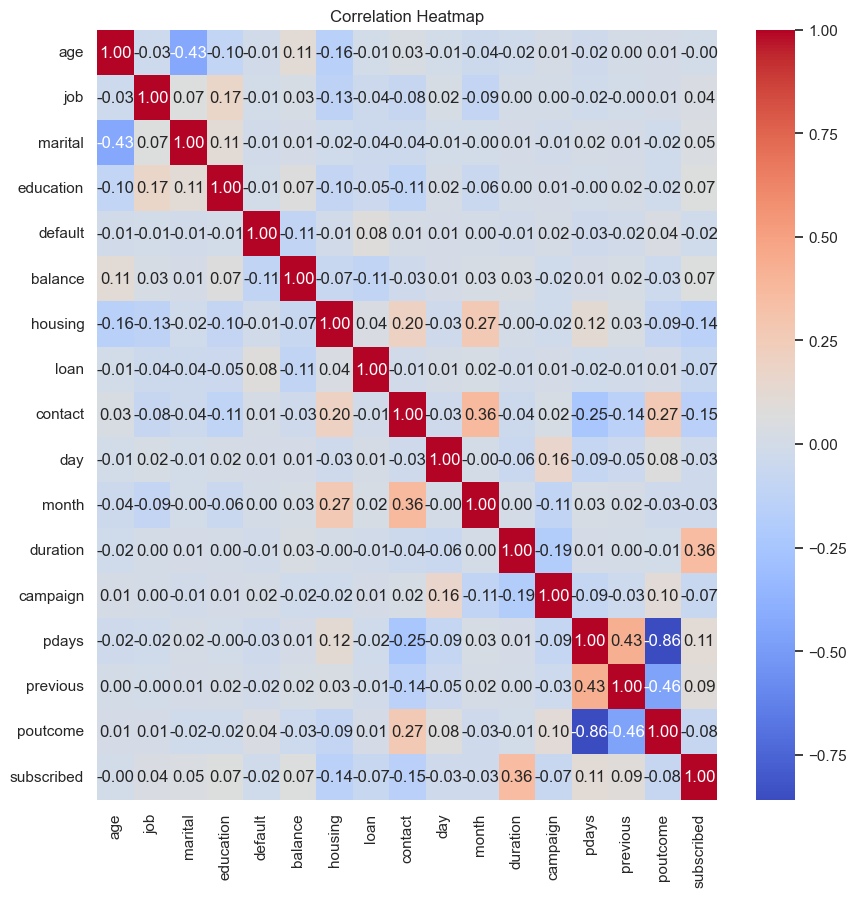

In [51]:
# Plotting the heatmap for correlation coefficient matrix
plt.figure(figsize = (10, 10))
sns.heatmap(correlation_coefficient, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

From the heatmap we can conclude, pdays and poutcome variables are highly negatively correlated. 

In [52]:
# Extracting features and target from dataset
features = df_train2.drop(columns = ['subscribed'])
target = df_train2['subscribed']

#### Feature Scaling

In [53]:
# Performing standard scaling on the features
scaler = StandardScaler()
scaled_df_train2 = scaler.fit_transform(features)

In [54]:
df_train3 = pd.DataFrame(scaled_df_train2, columns = features.columns[:])
df_train3.head()

age       job   marital  education   default   balance   housing  \
0  1.341382 -1.324317 -0.275405   2.369229 -0.137234  0.405049 -1.118201   
1 -0.966378  2.037729 -0.275405  -0.300345 -0.137234 -0.598015 -1.118201   
2 -1.538153  0.815167 -0.275405  -0.300345 -0.137234 -0.109265  0.894294   
3  1.406955 -0.101755 -1.922374   1.034442 -0.137234  0.997517 -1.118201   
4 -0.966378  1.426448 -0.275405  -0.300345 -0.137234 -0.531148  0.894294   

       loan   contact       day     month  duration  campaign     pdays  \
0 -0.439893  0.395076  0.379579  1.154007 -1.443825 -0.245906 -0.408555   
1 -0.439893 -0.716695  0.499526 -0.177462 -0.751296 -0.245906 -0.408555   
2 -0.439893 -0.716695  0.259631 -0.177462  0.290005 -0.567059 -0.408555   
3 -0.439893 -0.716695  0.739422  0.155405  1.895948 -0.567059  0.447299   
4 -0.439893 -0.716695 -1.419637 -0.843197  0.833299 -0.567059 -0.408555   

   previous  poutcome  
0 -0.237059  0.441777  
1 -0.237059  0.441777  
2 -0.237059  0.441777  
3  1.001336 -0.576498  
4 -0.237059  0.441777

#### Checking the Variance Inflation Factor

In [55]:
# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Features"] = df_train3.columns
vif_data["VIF"] = [variance_inflation_factor(df_train3.values, i) for i in range(df_train3.shape[1])]

# Print the VIF data
print(vif_data)

     Features       VIF
0         age  1.305383
1         job  1.050736
2     marital  1.254483
3   education  1.066007
4     default  1.018825
5     balance  1.050953
6     housing  1.178623
7        loan  1.023710
8     contact  1.323758
9         day  1.038525
10      month  1.250928
11   duration  1.040510
12   campaign  1.084420
13      pdays  3.851380
14   previous  1.281027
15   poutcome  4.043068


No multicollinearty exist between the features.

In [56]:
# Storing features and target in X1 and y1
X1 = df_train3
y1 = target

#### Checking class imbalance problem

In [57]:
# Checking for class imbalance
y1.value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

Yes, class imbalance prolem exist in target variable

In [58]:
# Fixing class imbalance problem using SMOTE
sm = SMOTE()
X, y = sm.fit_resample(X1, y1)

In [59]:
y.value_counts()

0    27932
1    27932
Name: subscribed, dtype: int64

#### Finding the best random state

In [60]:
# Finding best random state
max_accuracy = 0
max_random_state = 0
for i in range(1, 50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = i)
    rfc = RandomForestClassifier(random_state = i)
    rfc.fit(X_train, y_train)
    pred = rfc.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        max_random_state = i 
print("Best Accuracy score is", max_accuracy*100, "at random state", max_random_state)

Best Accuracy score is 94.9164677804296 at random state 7


#### Splitting the dataset into training and testing sets

In [61]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = max_random_state)

#### Different Models for predicting Term Deposit Subscription

In [62]:
# Using different classification models for predicting Term Deposit Subscription

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_lr))
print("Classifiction report:", classification_report(y_test, y_pred_lr))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_lr))

Accuracy score: 0.8097255369928401
Classifiction report:               precision    recall  f1-score   support

           0       0.83      0.79      0.81      8466
           1       0.79      0.83      0.81      8294

    accuracy                           0.81     16760
   macro avg       0.81      0.81      0.81     16760
weighted avg       0.81      0.81      0.81     16760

Confusion matrix: [[6684 1782]
 [1407 6887]]


In [63]:
# K-Nearest Neighbors
knc_model = KNeighborsClassifier(n_neighbors = 3)
knc_model.fit(X_train, y_train)
y_pred_knc = knc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_knc))
print("Classifiction report:", classification_report(y_test, y_pred_knc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_knc))

Accuracy score: 0.9233890214797136
Classifiction report:               precision    recall  f1-score   support

           0       0.99      0.86      0.92      8466
           1       0.87      0.99      0.93      8294

    accuracy                           0.92     16760
   macro avg       0.93      0.92      0.92     16760
weighted avg       0.93      0.92      0.92     16760

Confusion matrix: [[7240 1226]
 [  58 8236]]


In [64]:
# Gaussian Naive Bayes
gnb_model = GaussianNB(var_smoothing = 0.2)
gnb_model.fit(X_train, y_train)
y_pred_gnb = gnb_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_gnb))
print("Classifiction report:", classification_report(y_test, y_pred_gnb))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_gnb))

Accuracy score: 0.7448687350835322
Classifiction report:               precision    recall  f1-score   support

           0       0.84      0.61      0.71      8466
           1       0.69      0.88      0.77      8294

    accuracy                           0.74     16760
   macro avg       0.76      0.75      0.74     16760
weighted avg       0.77      0.74      0.74     16760

Confusion matrix: [[5185 3281]
 [ 995 7299]]


In [65]:
# Support Vector Classifier
svc_model = SVC(C = 1.0, kernel = 'rbf', gamma = 'scale')
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_svc))
print("Classifiction report:", classification_report(y_test, y_pred_svc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_svc))

Accuracy score: 0.8657517899761337
Classifiction report:               precision    recall  f1-score   support

           0       0.91      0.82      0.86      8466
           1       0.83      0.92      0.87      8294

    accuracy                           0.87     16760
   macro avg       0.87      0.87      0.87     16760
weighted avg       0.87      0.87      0.87     16760

Confusion matrix: [[6902 1564]
 [ 686 7608]]


In [66]:
# Decision Tree Classifier
dtc_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dtc_model.fit(X_train, y_train)
y_pred_dtc = dtc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_dtc))
print("Classifiction report:", classification_report(y_test, y_pred_dtc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_dtc))

Accuracy score: 0.9106801909307876
Classifiction report:               precision    recall  f1-score   support

           0       0.92      0.90      0.91      8466
           1       0.90      0.92      0.91      8294

    accuracy                           0.91     16760
   macro avg       0.91      0.91      0.91     16760
weighted avg       0.91      0.91      0.91     16760

Confusion matrix: [[7660  806]
 [ 691 7603]]


In [67]:
# Random Forest Classifier 
rfc_model = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, max_depth = 10, random_state = 42)
rfc_model.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_rfc))
print("Classifiction report:", classification_report(y_test, y_pred_rfc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_rfc))

Accuracy score: 0.9008353221957041
Classifiction report:               precision    recall  f1-score   support

           0       0.94      0.86      0.90      8466
           1       0.87      0.94      0.90      8294

    accuracy                           0.90     16760
   macro avg       0.90      0.90      0.90     16760
weighted avg       0.90      0.90      0.90     16760

Confusion matrix: [[7303 1163]
 [ 499 7795]]


In [68]:
# Extra Trees Classifier
etc_model = ExtraTreesClassifier(criterion = 'entropy', n_estimators = 100, max_depth = 10, random_state = 42)
etc_model.fit(X_train, y_train)
y_pred_etc = etc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_etc))
print("Classifiction report:", classification_report(y_test, y_pred_etc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_etc))

Accuracy score: 0.855071599045346
Classifiction report:               precision    recall  f1-score   support

           0       0.89      0.81      0.85      8466
           1       0.83      0.90      0.86      8294

    accuracy                           0.86     16760
   macro avg       0.86      0.86      0.85     16760
weighted avg       0.86      0.86      0.85     16760

Confusion matrix: [[6893 1573]
 [ 856 7438]]


In [69]:
# AdaBoost Classifier
abc_model = AdaBoostClassifier(n_estimators = 100, learning_rate = 1.0, random_state = 42)
abc_model.fit(X_train, y_train)
y_pred_abc = abc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_abc))
print("Classifiction report:", classification_report(y_test, y_pred_abc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_abc))

Accuracy score: 0.9073985680190931
Classifiction report:               precision    recall  f1-score   support

           0       0.91      0.91      0.91      8466
           1       0.91      0.90      0.91      8294

    accuracy                           0.91     16760
   macro avg       0.91      0.91      0.91     16760
weighted avg       0.91      0.91      0.91     16760

Confusion matrix: [[7713  753]
 [ 799 7495]]


In [70]:
# Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gbc_model.fit(X_train, y_train)
y_pred_gbc = gbc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_gbc))
print("Classifiction report:", classification_report(y_test, y_pred_gbc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_gbc))

Accuracy score: 0.9163484486873509
Classifiction report:               precision    recall  f1-score   support

           0       0.93      0.90      0.92      8466
           1       0.90      0.93      0.92      8294

    accuracy                           0.92     16760
   macro avg       0.92      0.92      0.92     16760
weighted avg       0.92      0.92      0.92     16760

Confusion matrix: [[7623  843]
 [ 559 7735]]


In [71]:
# XGBoost Classifier
xgbc_model = xgb.XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
xgbc_model.fit(X_train, y_train)
y_pred_xgbc = xgbc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_xgbc))
print("Classifiction report:", classification_report(y_test, y_pred_xgbc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_xgbc))

Accuracy score: 0.911217183770883
Classifiction report:               precision    recall  f1-score   support

           0       0.93      0.89      0.91      8466
           1       0.89      0.93      0.91      8294

    accuracy                           0.91     16760
   macro avg       0.91      0.91      0.91     16760
weighted avg       0.91      0.91      0.91     16760

Confusion matrix: [[7530  936]
 [ 552 7742]]


In [72]:
# Bagging Classifier
bc_model = BaggingClassifier(n_estimators = 100, max_samples = 1.0, max_features = 1.0, random_state = 42)
bc_model.fit(X_train, y_train)
y_pred_bc = bc_model.predict(X_test)

print("Accuracy score:", accuracy_score(y_test, y_pred_bc))
print("Classifiction report:", classification_report(y_test, y_pred_bc))
print("Confusion matrix:", confusion_matrix(y_test, y_pred_bc))

Accuracy score: 0.9412887828162291
Classifiction report:               precision    recall  f1-score   support

           0       0.96      0.92      0.94      8466
           1       0.92      0.96      0.94      8294

    accuracy                           0.94     16760
   macro avg       0.94      0.94      0.94     16760
weighted avg       0.94      0.94      0.94     16760

Confusion matrix: [[7806  660]
 [ 324 7970]]


#### Cross Validation

In [73]:
# Applying Cross Validation Methods on each model

# For Logistic Regression
cv_score = cross_val_score(lr_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_lr) - cv_score.mean())

[0.80085921 0.80927235 0.80846684 0.81553746 0.81543144]
0.8099134597947861
Difference between accuracy score and cross validation score: -0.00018792280194601663


In [74]:
# For K-Nearest Neighbors
cv_score = cross_val_score(knc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_knc) - cv_score.mean())

[0.92365524 0.92616128 0.92848832 0.92499776 0.92776584]
0.9262136895344704
Difference between accuracy score and cross validation score: -0.002824668054756785


In [75]:
# For Gaussian Naive Bayes
cv_score = cross_val_score(gnb_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_gnb) - cv_score.mean())

[0.7454578  0.74715833 0.74223575 0.75637698 0.74498747]
0.7472432647895582
Difference between accuracy score and cross validation score: -0.0023745297060259185


In [76]:
# For Support Vector Classifier
cv_score = cross_val_score(svc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_svc) - cv_score.mean())

[0.86109371 0.86914884 0.86941735 0.8727289  0.87128536]
0.8687348301325741
Difference between accuracy score and cross validation score: -0.002983040156440464


In [77]:
# For Decision Tree Classifier
cv_score = cross_val_score(dtc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_dtc) - cv_score.mean())

[0.82815716 0.92320773 0.92821982 0.9270563  0.93080917]
0.907490035069646
Difference between accuracy score and cross validation score: 0.003190155861141575


In [78]:
# For Random Forest Classifier
cv_score = cross_val_score(rfc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_rfc) - cv_score.mean())

[0.86243623 0.90226439 0.90718697 0.909156   0.90628357]
0.8974654306554383
Difference between accuracy score and cross validation score: 0.0033698915402657903


In [79]:
# For Extra Trees Classifier
cv_score = cross_val_score(etc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_etc) - cv_score.mean())

[0.83603329 0.85554462 0.84641547 0.85840866 0.85920158]
0.851120723200132
Difference between accuracy score and cross validation score: 0.00395087584521403


In [80]:
# For Gradient Boosting Classifier
cv_score = cross_val_score(gbc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_gbc) - cv_score.mean())

[0.82296608 0.92499776 0.92580328 0.9270563  0.92570712]
0.9053061077083138
Difference between accuracy score and cross validation score: 0.011042340979037113


In [81]:
# For AdaBoost Classifier
cv_score = cross_val_score(abc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_abc) - cv_score.mean())

[0.80282825 0.92455026 0.92034369 0.9273248  0.91899391]
0.8988081803260244
Difference between accuracy score and cross validation score: 0.008590387693068746


In [82]:
# For XGBoost Classifier
cv_score = cross_val_score(xgbc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_xgbc) - cv_score.mean())

[0.82591963 0.92455026 0.92428175 0.92535577 0.92418546]
0.9048585730862555
Difference between accuracy score and cross validation score: 0.006358610684627508


In [83]:
# For Bagging Classifier
cv_score = cross_val_score(bc_model, X, y)
print(cv_score)
print(cv_score.mean())
print("Difference between accuracy score and cross validation score:", accuracy_score(y_test, y_pred_bc) - cv_score.mean())

[0.87317641 0.94826815 0.94907366 0.95059518 0.9518439 ]
0.9345914587647982
Difference between accuracy score and cross validation score: 0.006697324051430864


Support Vector Classifier has given least difference between accuracy score and cross validation score that is -0.002983040156440464

Support Vector Classifier model is the best model,

#### Hyper Parameter Tuning

In [86]:
# Hyper parameter tuning

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.2, 1],               # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel function
    'gamma': ['scale', 'auto'],  # Kernel coefficient (for 'rbf' and 'poly' kernels)
    'degree': [2, 3],            # Degree of polynomial kernel
}

In [87]:
# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(SVC(), param_grid, cv = 5, scoring = 'r2')

In [ ]:
grid_search_cv.fit(X_train, y_train)

In [ ]:
grid_search_cv.best_params_

In [ ]:
best_params = grid_search.best_params_

In [ ]:
grid_search_cv.best_score_

In [ ]:
# Creating final model
final_model = SVC(**best_params)
final_model.fit(X_train, y_train)
pred_values = final_model.predict(X_test)
accu_score = accuracy_score(y_test, pred_values)
print(accu_score * 100)

#### Plotting AUC-ROC Curve

In [ ]:
fpr, tpr, thresolds = roc_curve(y_test, pred_values)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = final_model)
display.plot()
plt.show()

In [ ]:
# Saving the model 
joblib.dump(final_model, "Term_Deposit_Subscription_Prediction_Project.pkl")

In [ ]:
# Loading the saved model
model = joblib.load("Term_Deposit_Subscription_Prediction_Project.pkl")

# Predicting values
predicted_values = model.predict(X_test)

# Compairing actual and predicted values
actual_values = np.array(y_test)
df = pd.DataFrame()
df['Actual Values'] = actual_values
df['Predicted Values'] = predicted_values
df

In [ ]:
# Test dataset
df_test1.head()

In [ ]:
# Testing the model on test data

# Predictng term deposit subscription
prediction = final_model.predict(df_test1)

print(prediction)

In [ ]:
# Adding subscribed column in test dataset and storing predicted values
df_test['subscribed'] = prediction

In [ ]:
df_test.head()